In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [2]:
raw_data_path=os.path.join(os.path.pardir,'data','heartbeat')
print (raw_data_path)

..\data\heartbeat


In [3]:
data_path=os.path.join(raw_data_path,'mitbih_train.csv')
print (data_path)

..\data\heartbeat\mitbih_train.csv


In [4]:
!dir 

 Volume in drive C is Windows
 Volume Serial Number is BC66-004A

 Directory of C:\Users\DeeWu\heartbeat

2021-06-26  09:56 PM    <DIR>          .
2021-06-26  09:55 PM    <DIR>          ..
2021-06-26  09:56 PM    <DIR>          .ipynb_checkpoints
2021-06-26  09:53 PM            17,993 ECG arrhythmia.ipynb
               1 File(s)         17,993 bytes
               3 Dir(s)  46,875,865,088 bytes free


## dataset: https://www.kaggle.com/shayanfazeli/heartbeat

In [5]:
data = pd.read_csv(data_path, header=None)

In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


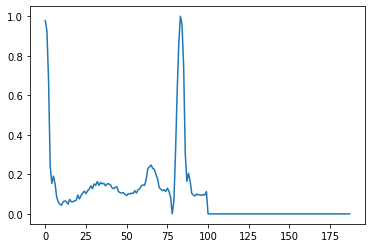

In [8]:
plt.plot(data.iloc[0])
plt.show()

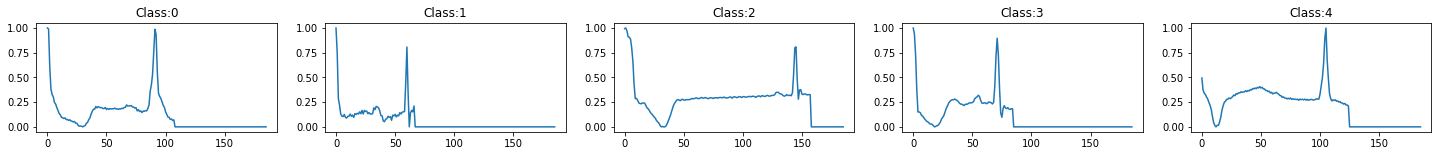

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25,2))
for i in range(5):
    ax[i].plot(df[df[187] ==float(i)].sample(1).iloc[0,:186])
    ax[i].set_title('Class:{}'.format(i))

<AxesSubplot:xlabel='187', ylabel='count'>

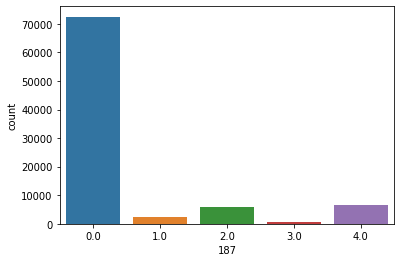

In [12]:
sns.countplot(x=187, data=df)

In [13]:
class_0 = df[df[187]==0.0].sample(8000)
class_1 = df[df[187]==1.0]
class_2 = df[df[187]==2.0]
class_3 = df[df[187]==3.0]
class_4 = df[df[187]==4.0]


In [14]:
new_df = pd.concat([class_0, class_1, class_2, class_3, class_4])

In [16]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10986,1.000000,0.835735,0.383285,0.000000,0.198847,0.311239,0.386167,0.386167,0.423631,0.426513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15161,0.987085,1.000000,0.583026,0.055351,0.000000,0.175277,0.271218,0.263838,0.250923,0.258303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54993,0.926829,1.000000,0.619137,0.378987,0.371482,0.343340,0.330206,0.362101,0.390244,0.463415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68702,0.456929,0.014981,0.123596,0.299625,0.408240,0.449438,0.434457,0.434457,0.464419,0.468165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9650,0.994911,0.964377,0.743003,0.325700,0.137405,0.173028,0.137405,0.066158,0.055980,0.043257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='187', ylabel='count'>

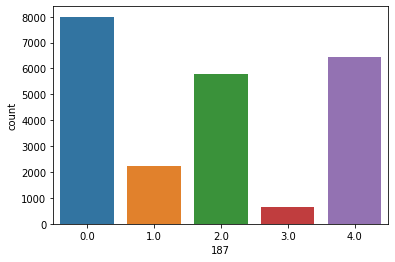

In [17]:
sns.countplot(x=187, data = new_df)

## Train/Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df.drop([187], axis=1), new_df[187], test_size=0.33, random_state=42)

In [19]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1],1)

## Define Model

In [25]:
#!pip install tensorflow
from tensorflow.keras import Sequential, utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

In [26]:
model = Sequential()

In [29]:
model.add(Conv1D(filters=32, kernel_size=(3,),padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=(3,),padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=(5,),padding='same', activation='relu'))

In [30]:
model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
model.add(Dropout(0.5))

In [31]:
model.add(Flatten())

In [32]:
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 1024, activation='relu'))
model.add(Dense(units = 5, activation='softmax'))


## Define Optimizer

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## train the model

In [37]:
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test,y_test))

Epoch 1/10
484/484 [==============================] - 42s 84ms/step - loss: 0.4301 - accuracy: 0.8455 - val_loss: 0.2514 - val_accuracy: 0.9180
Epoch 2/10
484/484 [==============================] - 35s 72ms/step - loss: 0.2316 - accuracy: 0.9233 - val_loss: 0.2053 - val_accuracy: 0.9332
Epoch 3/10
484/484 [==============================] - 31s 65ms/step - loss: 0.1704 - accuracy: 0.9424 - val_loss: 0.1527 - val_accuracy: 0.9508
Epoch 4/10
484/484 [==============================] - 32s 66ms/step - loss: 0.1387 - accuracy: 0.9527 - val_loss: 0.1470 - val_accuracy: 0.9525
Epoch 5/10
484/484 [==============================] - 31s 65ms/step - loss: 0.1144 - accuracy: 0.9615 - val_loss: 0.1440 - val_accuracy: 0.9537
Epoch 6/10
484/484 [==============================] - 31s 65ms/step - loss: 0.0945 - accuracy: 0.9675 - val_loss: 0.1398 - val_accuracy: 0.9587
Epoch 7/10
484/484 [==============================] - 32s 66ms/step - loss: 0.0845 - accuracy: 0.9703 - val_loss: 0.1545 - val_accuracy:

In [38]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

In [39]:
epochs = range(len(acc))

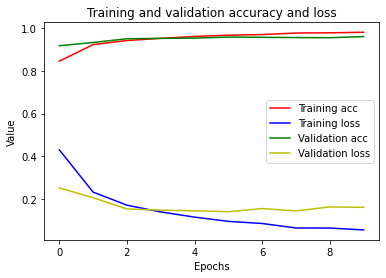

In [41]:
plt.plot(epochs,acc,"r",label='Training acc')
plt.plot(epochs,loss,"b",label='Training loss')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.plot(epochs,val_loss,'y',label='Validation loss')

plt.title('Training and validation accuracy and loss')
plt.xlabel('Epochs')
plt.ylabel("Value")
plt.legend()
plt.show()

In [42]:
# model predict result
y_pred = model.predict(X_test)
print(y_pred[1])

[8.7611889e-04 9.9912328e-01 5.4784670e-07 6.0417214e-08 4.7739192e-08]


In [43]:
y_lbl = [np.where(i==np.max(i))[0][0] for i in y_pred]
print(y_lbl[1])

1


<AxesSubplot:>

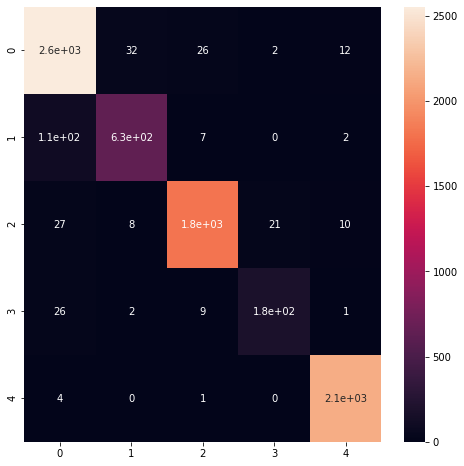

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_lbl)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(mat,annot=True)

In [46]:
from sklearn import metrics
print("Accuracy of the predictions:{}".format(metrics.accuracy_score(y_lbl,y_test)))

Accuracy of the predictions:0.9608821212916776


## Testing in test dataset

In [48]:
test_path=os.path.join(raw_data_path,'mitbih_test.csv')
print (data_path)

..\data\heartbeat\mitbih_train.csv


In [49]:
test_data = pd.read_csv(test_path, header=None)

In [50]:
test_df = pd.DataFrame(test_data)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='187', ylabel='count'>

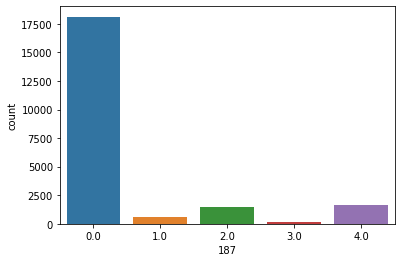

In [51]:
sns.countplot(x=187, data = test_df)

In [52]:
test_X = test_df.drop([187], axis =1)
test_y = test_df[187]
test_X = np.array(test_X).reshape(test_X.shape[0], test_X.shape[1], 1)

In [54]:
test_pred_y = model.predict(test_X)
test_lbl_y = [np.where(i==np.max(i))[0][0] for i in test_pred_y]

<AxesSubplot:>

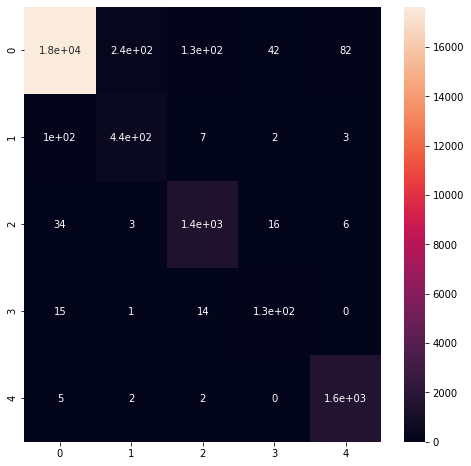

In [55]:
mat = confusion_matrix(test_y, test_lbl_y)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(mat,annot=True)

In [57]:
print("Accuracy of the predictions:{}".format(metrics.accuracy_score(test_lbl_y,test_y)))

Accuracy of the predictions:0.9676594189658323


## Test Individual

Number of Chart8787


Text(0.5, 0, 'prediction of patient 8787:class0')

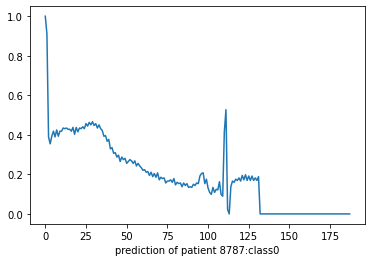

In [58]:
test_number = int(input("Number of Chart"))
plt.plot(test_data.iloc[test_number])
plt.xlabel("prediction of patient {}:class{}".format(test_number, test_lbl_y[test_number]))